In [1]:
import pandas as pd
import numpy as np

orcs = pd.read_csv('orcs_cleaned.csv', index_col=0, encoding='utf-8')
orcs

,age,nationality,family,edu_lvl_cl,mil_rank_cl,region
orc_id,,,,,,
2,33,русский,True,среднее,Старший Сержант,Кировская область
3,28,бурят,True,среднее,Младший Сержант,Сахалинская область
4,26,русский,True,среднее,Матрос,Приморский край
5,19,русский,True,среднее,Матрос,Приморский край
8,36,русский,True,среднее,Прапорщик,Томская область
...,...,...,...,...,...,...
110825,29,русский,False,среднее,Рядовой,Республика Адыгея
110826,37,русский,False,среднее,Старший Офицер,Республика Адыгея
110828,34,русский,True,среднее,Прапорщик,Республика Адыгея


In [2]:
targets = orcs.age
features = orcs.drop(['age'], axis=1)
#features = pd.get_dummies(features)
features

,nationality,family,edu_lvl_cl,mil_rank_cl,region
orc_id,,,,,
2,русский,True,среднее,Старший Сержант,Кировская область
3,бурят,True,среднее,Младший Сержант,Сахалинская область
4,русский,True,среднее,Матрос,Приморский край
5,русский,True,среднее,Матрос,Приморский край
8,русский,True,среднее,Прапорщик,Томская область
...,...,...,...,...,...
110825,русский,False,среднее,Рядовой,Республика Адыгея
110826,русский,False,среднее,Старший Офицер,Республика Адыгея
110828,русский,True,среднее,Прапорщик,Республика Адыгея


In [3]:
from sklearn.preprocessing import LabelEncoder

lables = features.columns
size = len(lables)
features
for i in range(size):
    features[lables[i]]= LabelEncoder().fit_transform(features[lables[i]])   
features

,nationality,family,edu_lvl_cl,mil_rank_cl,region
orc_id,,,,,
2,16,1,1,25,21
3,5,1,1,14,65
4,16,1,1,12,42
5,16,1,1,12,42
8,16,1,1,17,71
...,...,...,...,...,...
110825,16,0,1,18,44
110826,16,0,1,23,44
110828,16,1,1,17,44


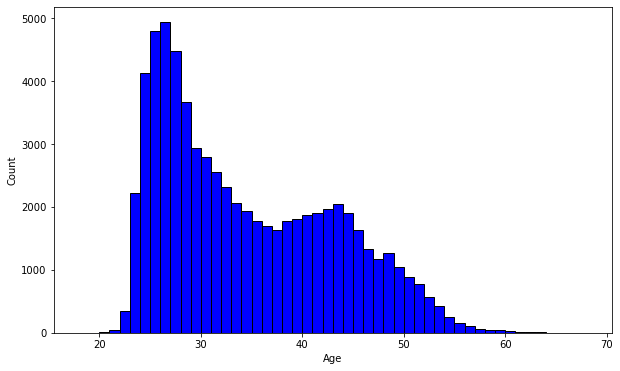

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(orcs.age, bins=50, ec='black', color='b')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [5]:
temp_orcs = orcs

for i in range(size):
    temp_orcs[lables[i]] = features[lables[i]]

temp_orcs.corr()

,age,nationality,family,edu_lvl_cl,mil_rank_cl,region
age,1.000000,0.003350,-0.000342,0.005214,0.017757,0.037185
nationality,0.003350,1.000000,-0.007489,0.118146,0.001218,0.004776
family,-0.000342,-0.007489,1.000000,-0.004524,0.003680,-0.002186
edu_lvl_cl,0.005214,0.118146,-0.004524,1.000000,-0.002116,0.004799
mil_rank_cl,0.017757,0.001218,0.003680,-0.002116,1.000000,-0.001410
region,0.037185,0.004776,-0.002186,0.004799,-0.001410,1.000000


In [6]:
mask = np.zeros_like(temp_orcs.corr())
triangle_indeces = np.triu_indices_from(mask)
mask[triangle_indeces] = True
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

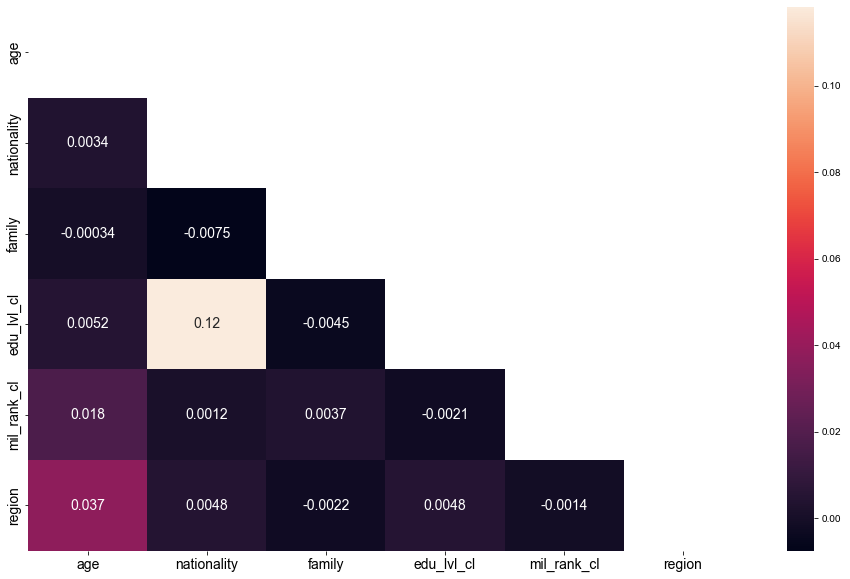

In [10]:
import seaborn as sns

Mask = np.zeros_like(temp_orcs.corr())
triangle_indeces = np.triu_indices_from(Mask)
Mask[triangle_indeces] = True

plt.figure(figsize=(16,10))
sns.heatmap(temp_orcs.corr(), mask=Mask, annot = True, annot_kws={"size" : 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

lables = features.columns

length = len(lables)

for i in range(2, 5):
    for label in range(length):
        features[f"{lables[label]}_{i}"] = np.power(scale(features[lables[label]]), i)

features = StandardScaler().fit_transform(features)
features

array([[ 0.58742396, -0.00544569, -0.00770148, ..., -0.19138372,
        -0.06969354, -0.03872734],
       [ 0.58742396, -0.00544569, -0.00770148, ..., -0.19138372,
        -0.06969354, -0.03872734],
       [ 0.58742396, -0.00544569, -0.00770148, ..., -0.19138372,
        -0.06969354, -0.03872734],
       ...,
       [ 0.58742396, -0.00544569, -0.00770148, ..., -0.19138372,
        -0.06969354, -0.03872734],
       [ 0.58742396, -0.00544569, -0.00770148, ..., -0.19138372,
        -0.06969354, -0.03872734],
       [ 0.58742396, -0.00544569, -0.00770148, ..., -0.19138372,
        -0.06969354, -0.03872734]])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, targets, random_state=42)

In [ ]:


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_train_prediced = model.predict(x_train)
y_test_prediced = model.predict(x_test)

from sklearn.metrics import r2_score

print("Train R-squared", r2_score(y_train_prediced, y_train))
print("Test R-squared", r2_score(y_test_prediced, y_test))

Train R-squared 0.9932480706703781
Test R-squared 0.8696972768928827
